In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [97]:
df_list = [pd.read_csv(f'data/citylearn_challenge_2022_phase_1/Building_{i}.csv') for i in range(1, 6)]

In [98]:
weather = pd.read_csv(f'data/citylearn_challenge_2022_phase_1/weather.csv')
pricing = pd.read_csv(f'data/citylearn_challenge_2022_phase_1/pricing.csv')
carbon_intensity = pd.read_csv(f'data/citylearn_challenge_2022_phase_1/carbon_intensity.csv')

In [99]:
for i, d in enumerate(df_list):
    d.loc[:, 'num_building'] = i
    d.dropna(inplace=True, axis=1)
    d.reset_index(inplace=True)
    
    d["solar_generation_rolling_60"] = d[["Solar Generation [W/kW]"]].rolling(60).mean()
    d["equipment_power_rolling_60"] = d[["Equipment Electric Power [kWh]"]].rolling(60).mean()

    d = d.merge(weather, left_index=True, right_index=True)
    d = d.merge(pricing, left_index=True, right_index=True)
    d = d.merge(carbon_intensity, left_index=True, right_index=True)
    df_list[i] = d

In [100]:
df = pd.concat(df_list, ignore_index=True)

In [101]:
carbon_intensity.describe()

kg_CO2/kWh
count  8760.000000
mean      0.156531
std       0.035370
min       0.070383
25%       0.131080
50%       0.154263
75%       0.178429
max       0.281796

In [102]:
weather.describe()

Outdoor Drybulb Temperature [C]  Relative Humidity [%]  \
count                      8760.000000            8760.000000   
mean                         16.837454              73.004224   
std                           3.564816              16.480251   
min                           5.600000              10.000000   
25%                          14.400000              65.000000   
50%                          17.200000              76.000000   
75%                          19.400000              84.000000   
max                          32.200000             100.000000   

       Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
count                     8760.000000                    8760.000000   
mean                       208.282192                     201.231507   
std                        292.799407                     296.193301   
min                          0.000000                       0.000000   
25%                          0.000000                       0.000000   
50%                         10.000000                       0.000000   
75%                        382.000000                     424.000000   
max                       1017.000000                     953.000000   

       6h Prediction Outdoor Drybulb Temperature [C]  \
count                                    8760.000000   
mean                                       16.837454   
std                                         3.564816   
min                                         5.600000   
25%                                        14.400000   
50%                                        17.200000   
75%                                        19.400000   
max                                        32.200000   

       12h Prediction Outdoor Drybulb Temperature [C]  \
count                                     8760.000000   
mean                                        16.837454   
std                                          3.564816   
min                                          5.600000   
25%                                         14.400000   
50%                                         17.200000   
75%                                         19.400000   
max                                         32.200000   

       24h Prediction Outdoor Drybulb Temperature [C]  \
count                                     8760.000000   
mean                                        16.837454   
std                                          3.564816   
min                                          5.600000   
25%                                         14.400000   
50%                                         17.200000   
75%                                         19.400000   
max                                         32.200000   

       6h Prediction Relative Humidity [%]  \
count                          8760.000000   
mean                             73.004224   
std                              16.480251   
min                              10.000000   
25%                              65.000000   
50%                              76.000000   
75%                              84.000000   
max                             100.000000   

       12h Prediction Relative Humidity [%]  \
count                           8760.000000   
mean                              73.004224   
std                               16.480251   
min                               10.000000   
25%                               65.000000   
50%                               76.000000   
75%                               84.000000   
max                              100.000000   

       24h Prediction Relative Humidity [%]  \
count                           8760.000000   
mean                              73.004224   
std                               16.480251   
min                               10.000000   
25%                               65.000000   
50%                               76.000000   
75%                               84.000000   
max                     

In [103]:
pricing.describe()

Electricity Pricing [$]  6h Prediction Electricity Pricing [$]  \
count              8760.000000                            8760.000000   
mean                  0.273131                               0.273131   
std                   0.117803                               0.117803   
min                   0.210000                               0.210000   
25%                   0.210000                               0.210000   
50%                   0.210000                               0.210000   
75%                   0.220000                               0.220000   
max                   0.540000                               0.540000   

       12h Prediction Electricity Pricing [$]  \
count                             8760.000000   
mean                                 0.273131   
std                                  0.117803   
min                                  0.210000   
25%                                  0.210000   
50%                                  0.210000   
75%                                  0.220000   
max                                  0.540000   

       24h Prediction Electricity Pricing [$]  
count                             8760.000000  
mean                                 0.273131  
std                                  0.117803  
min                                  0.210000  
25%                                  0.210000  
50%                                  0.210000  
75%                                  0.220000  
max                                  0.540000

In [104]:
df

index  Month  Hour  Day Type  Daylight Savings Status  \
0          0    8.0   0.0       1.0                        0   
1          1    8.0   1.0       1.0                        0   
2          2    8.0   2.0       1.0                        0   
3          3    8.0   3.0       1.0                        0   
4          4    8.0   4.0       1.0                        0   
...      ...    ...   ...       ...                      ...   
43795   8755    7.0  19.0       1.0                        0   
43796   8756    7.0  20.0       1.0                        0   
43797   8757    7.0  21.0       1.0                        0   
43798   8758    7.0  22.0       1.0                        0   
43799   8759    7.0  23.0       1.0                        0   

       Equipment Electric Power [kWh]  DHW Heating [kWh]  Cooling Load [kWh]  \
0                            2.275800                  0                   0   
1                            0.851167                  0                   0   
2                            0.834600                  0                   0   
3                            0.838167                  0                   0   
4                            1.478433                  0                   0   
...                               ...                ...                 ...   
43795                        2.730183                  0                   0   
43796                        0.935833                  0                   0   
43797                        2.155017                  0                   0   
43798                        2.316400                  0                   0   
43799                        1.212400                  0                   0   

       Heating Load [kWh]  Solar Generation [W/kW]  ...  \
0                       0                 0.000000  ...   
1                       0                 0.000000  ...   
2                       0                 0.000000  ...   
3                       0                 0.000000  ...   
4                       0                 0.000000  ...   
...                   ...                      ...  ...   
43795                   0                 4.070833  ...   
43796                   0                 0.000000  ...   
43797                   0                 0.000000  ...   
43798                   0                 0.000000  ...   
43799                   0                 0.000000  ...   

       12h Prediction Diffuse Solar Radiation [W/m2]  \
0                                              964.0   
1                                              966.0   
2                                              683.0   
3                                              522.0   
4                                              444.0   
...                                              ...   
43795                                          201.0   
43796                                          420.0   
43797                                          554.0   
43798                                          778.0   
43799                                          903.0   

       24h Prediction Diffuse Solar Radiation [W/m2]  \
0                                                0.0   
1                                                0.0   
2                                                0.0   
3                                                0.0   
4                                                0.0   
...                                              ...   
43795                                           27.0   
43796                                            0.0   
43797                                            0.0   
43798                                            0.0   
43799                                            0.0   

       6h Prediction Direct Solar Radiation [W/m2]  \
0                                            100.0   
1                                            444.0   
2                                            592.0   
3     

In [105]:
df.describe()

index         Month          Hour      Day Type  \
count  43800.000000  43800.000000  43800.000000  43800.000000   
mean    4379.500000      6.526027     11.500000      3.991781   
std     2528.823031      3.447891      6.922266      2.003428   
min        0.000000      1.000000      0.000000      1.000000   
25%     2189.750000      4.000000      5.750000      2.000000   
50%     4379.500000      7.000000     11.500000      4.000000   
75%     6569.250000     10.000000     17.250000      6.000000   
max     8759.000000     12.000000     23.000000      7.000000   

       Daylight Savings Status  Equipment Electric Power [kWh]  \
count                  43800.0                    43800.000000   
mean                       0.0                        1.066398   
std                        0.0                        0.889050   
min                        0.0                        0.000000   
25%                        0.0                        0.436815   
50%                        0.0                        0.754500   
75%                        0.0                        1.463815   
max                        0.0                        7.987483   

       DHW Heating [kWh]  Cooling Load [kWh]  Heating Load [kWh]  \
count            43800.0             43800.0             43800.0   
mean                 0.0                 0.0                 0.0   
std                  0.0                 0.0                 0.0   
min                  0.0                 0.0                 0.0   
25%                  0.0                 0.0                 0.0   
50%                  0.0                 0.0                 0.0   
75%                  0.0                 0.0                 0.0   
max                  0.0                 0.0                 0.0   

       Solar Generation [W/kW]  ...  \
count             43800.000000  ...   
mean                167.863575  ...   
std                 245.248185  ...   
min                   0.000000  ...   
25%                   0.000000  ...   
50%                   0.000000  ...   
75%                 318.446875  ...   
max                 976.250000  ...   

       12h Prediction Diffuse Solar Radiation [W/m2]  \
count                                   43800.000000   
mean                                      208.282192   
std                                       292.786037   
min                                         0.000000   
25%                                         0.000000   
50%                                        10.000000   
75%                                       382.000000   
max                                      1017.000000   

       24h Prediction Diffuse Solar Radiation [W/m2]  \
count                                   43800.000000   
mean                                      208.282192   
std                                       292.786037   
min                                         0.000000   
25%                                         0.000000   
50%                                        10.000000   
75%                                       382.000000   
max                                      1017.000000   

       6h Prediction Direct Solar Radiation [W/m2]  \
count                                 43800.000000   
mean                                    201.231507   
std                                     296.179776   
min                                       0.000000   
25%                                       0.000000   
50%                                       0.000000   
75%                                     424.000000   
max                                     953.000000   

       12h Prediction Direct Solar Radiation [W/m2]  \
count                                  43800.000000   
mean                                     201.231507   
std                                      296.179776   
min                                        0.000000   
25%                                        0.000000   
50%                                      

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 34 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   index                                           43800 non-null  int64  
 1   Month                                           43800 non-null  float64
 2   Hour                                            43800 non-null  float64
 3   Day Type                                        43800 non-null  float64
 4   Daylight Savings Status                         43800 non-null  int64  
 5   Equipment Electric Power [kWh]                  43800 non-null  float64
 6   DHW Heating [kWh]                               43800 non-null  int64  
 7   Cooling Load [kWh]                              43800 non-null  int64  
 8   Heating Load [kWh]                              43800 non-null  int64  
 9   Solar Generation [W/kW]                

<AxesSubplot:xlabel='Hour', ylabel='Solar Generation [W/kW]'>

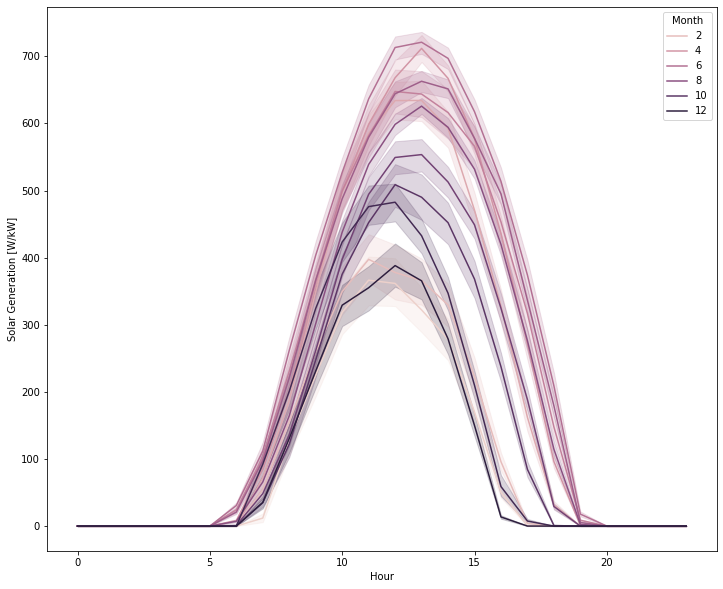

In [52]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=df, x="Hour", y="Solar Generation [W/kW]", hue="Month")

<AxesSubplot:xlabel='Day Type', ylabel='Solar Generation [W/kW]'>

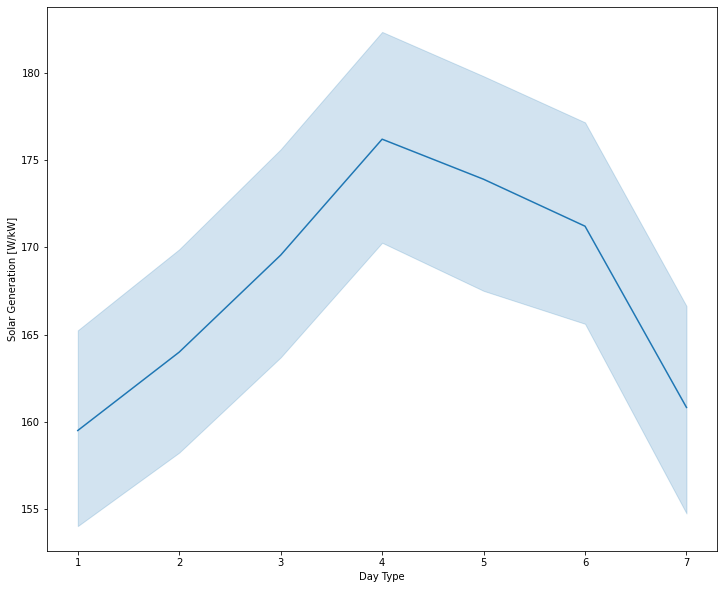

In [53]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=df, x="Day Type", y="Solar Generation [W/kW]")

In [54]:
sorted(df["Month"].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

<AxesSubplot:xlabel='Hour', ylabel='Equipment Electric Power [kWh]'>

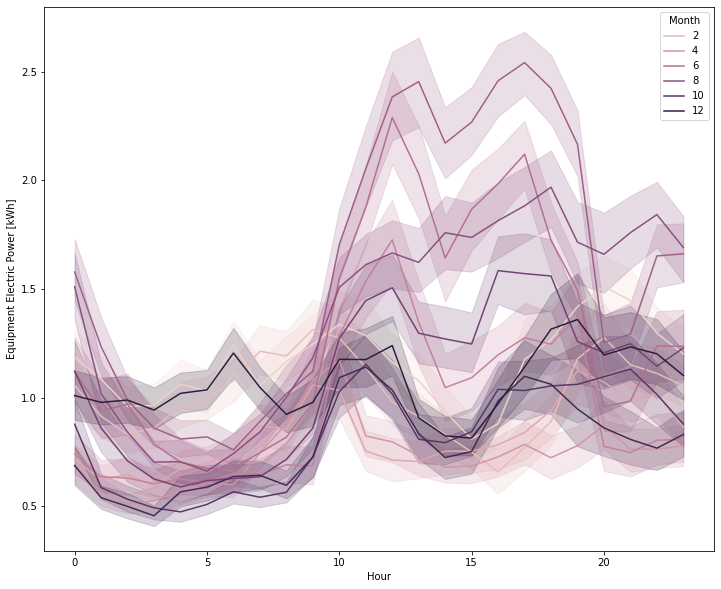

In [55]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=df, x="Hour", y="Equipment Electric Power [kWh]", hue="Month")

<AxesSubplot:xlabel='Hour', ylabel='Equipment Electric Power [kWh]'>

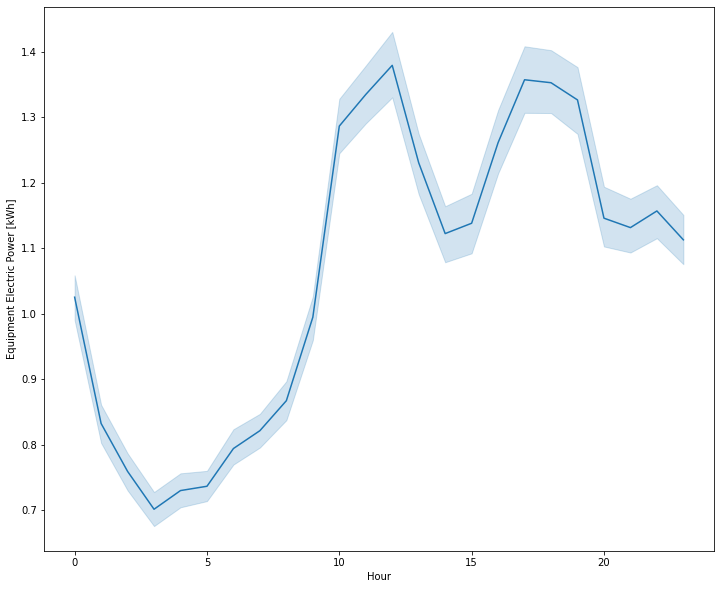

In [56]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=df, x="Hour", y="Equipment Electric Power [kWh]")

<AxesSubplot:xlabel='Day Type', ylabel='Equipment Electric Power [kWh]'>

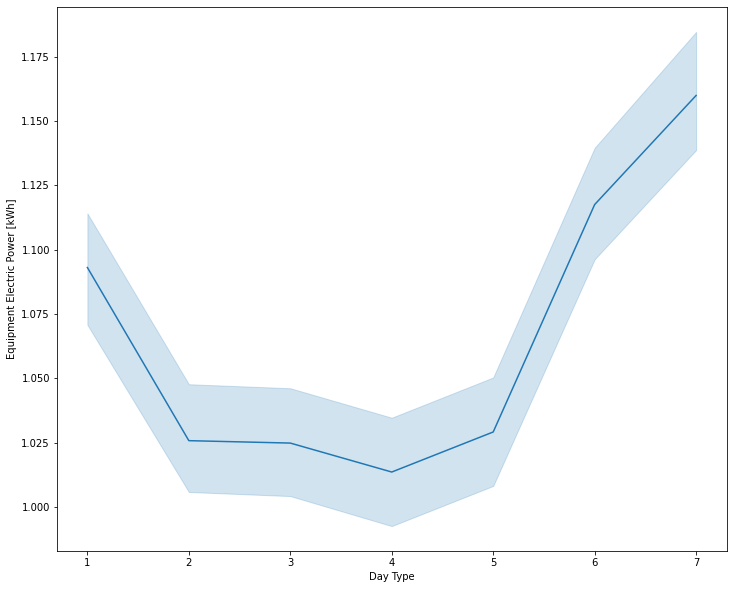

In [57]:
plt.subplots(figsize=(12, 10))
sns.lineplot(data=df, x="Day Type", y="Equipment Electric Power [kWh]")

In [58]:
df["Day Type"].unique()

array([1., 2., 3., 4., 5., 6., 7.])

In [72]:
def plot_building(data, x, y, hue=None):
    fig, axes = plt.subplots(1, 5, figsize=(26, 12))

    for i in range(0, 5):
        axes[i].set_title(f"Building {i}")
        if hue:
            sns.lineplot(data=df[df["num_building"] == i], x=x, y=y, hue=hue, ax=axes[i])
        else:
            sns.lineplot(data=df[df["num_building"] == i], x=x, y=y, ax=axes[i])

In [73]:
def plot_together(data, x, y, hue=None):
    fig, axes = plt.subplots(figsize=(16, 10))
    if hue:
        sns.lineplot(data=df, x=x, y=y, hue=hue)
    else:
        sns.lineplot(data=df, x=x, y=y)

In [74]:
df["mean_solar_generation_month"] = df[["Month", "Solar Generation [W/kW]", "num_building"]].groupby(["num_building","Month"]).transform(np.mean)
df["mean_equipment_power_month"] = df[["Month", "Equipment Electric Power [kWh]", "num_building"]].groupby(["num_building","Month"]).transform(np.mean)

# Solar Generation

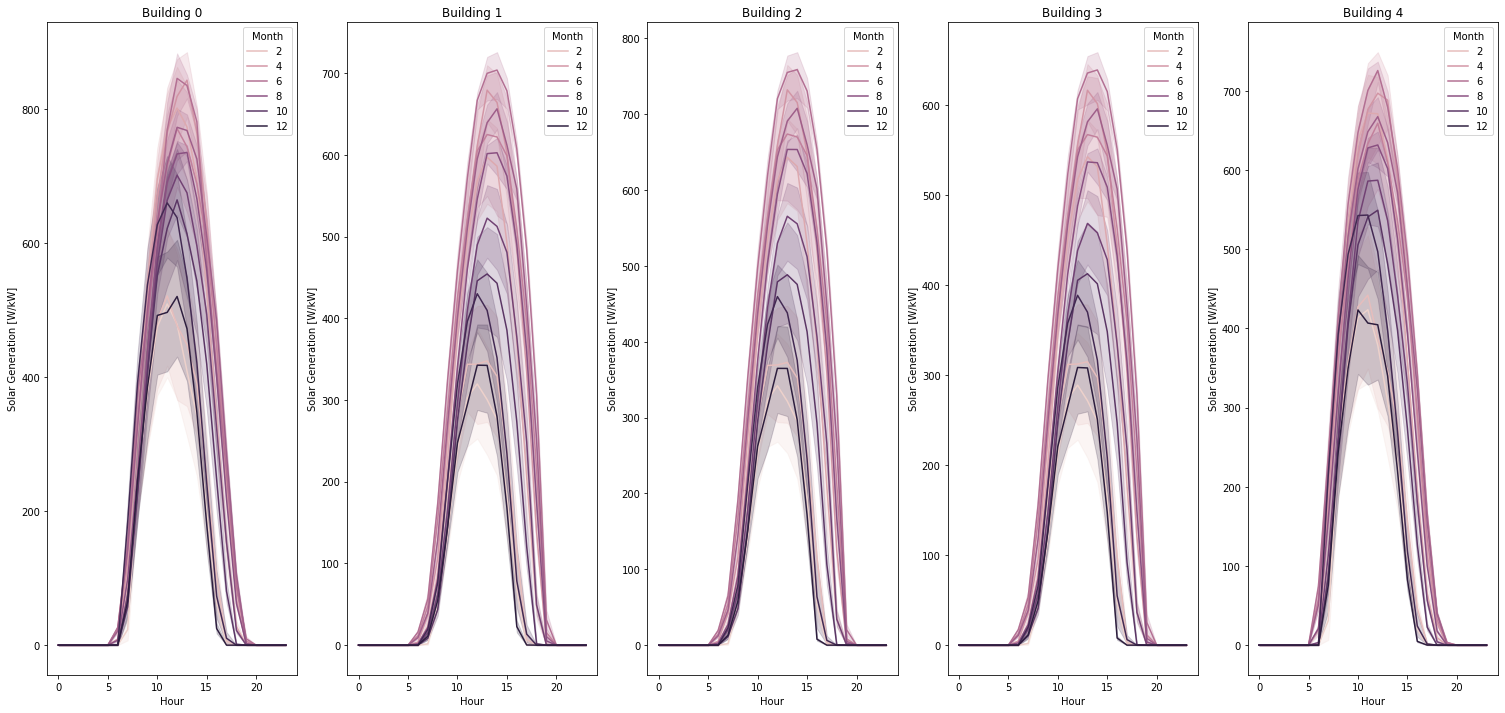

In [61]:
plot_building(df, "Hour", "Solar Generation [W/kW]", "Month")

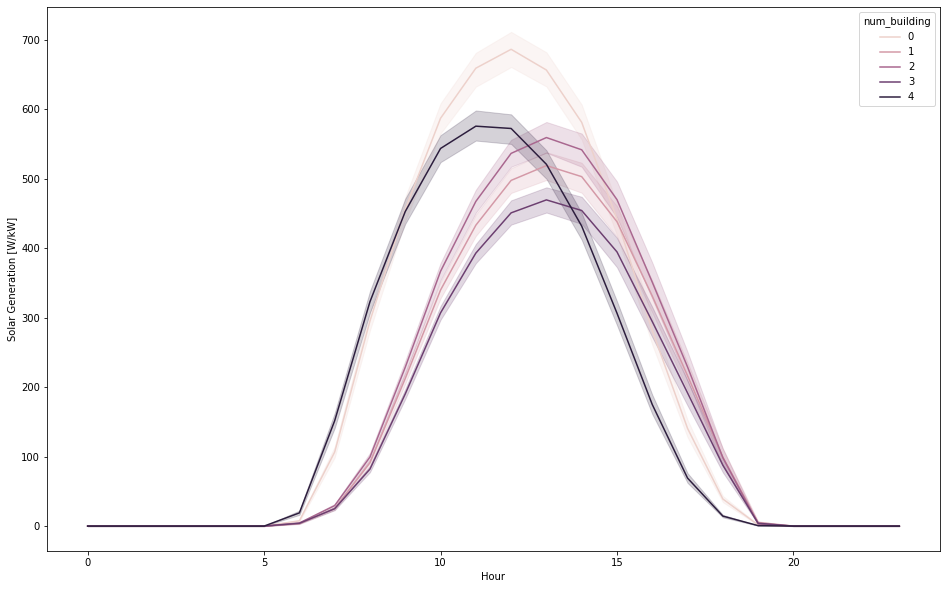

In [69]:
plot_together(df, "Hour", "Solar Generation [W/kW]", "num_building")

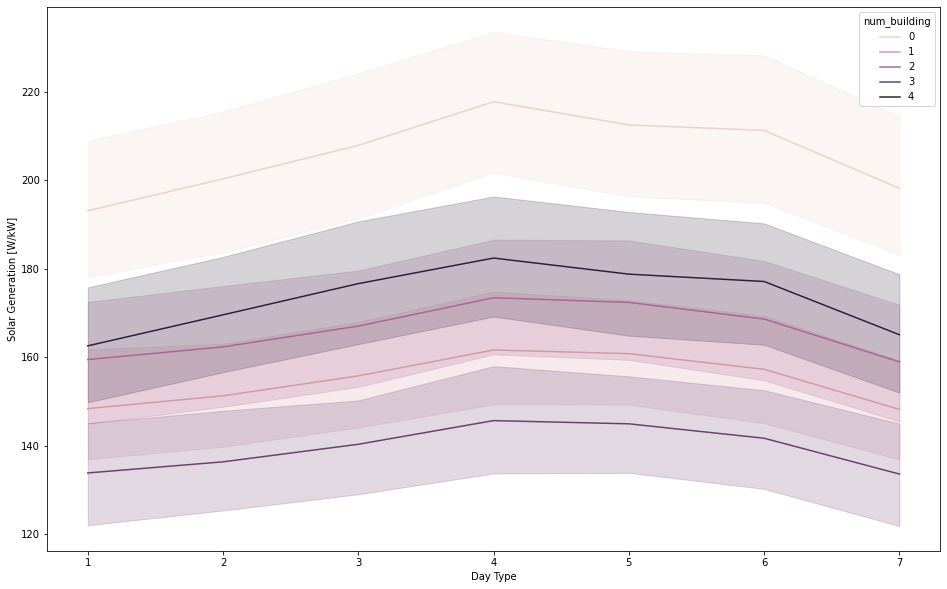

In [71]:
plot_together(df, "Day Type", "Solar Generation [W/kW]", "num_building")

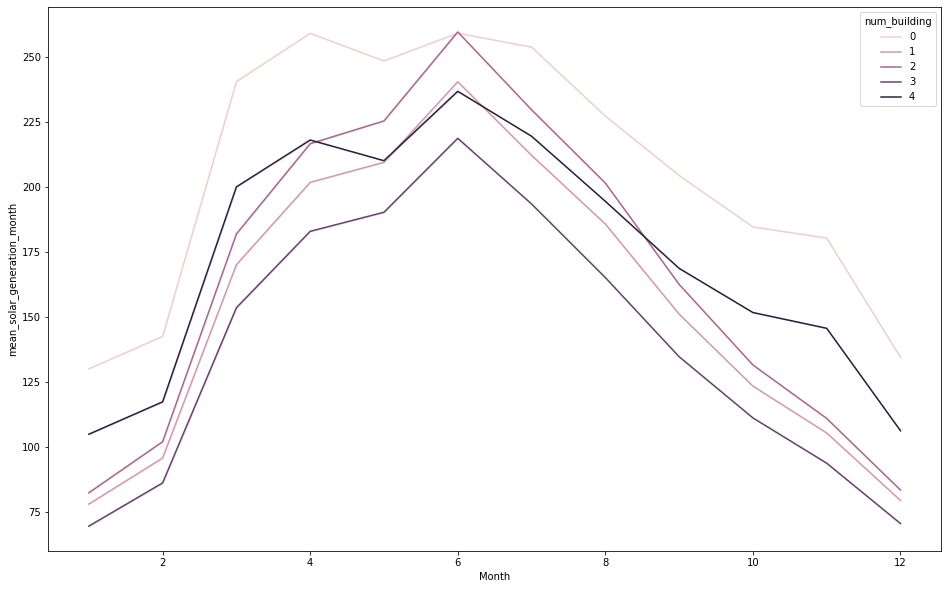

In [84]:
plot_together(df, "Month", "mean_solar_generation_month", "num_building")

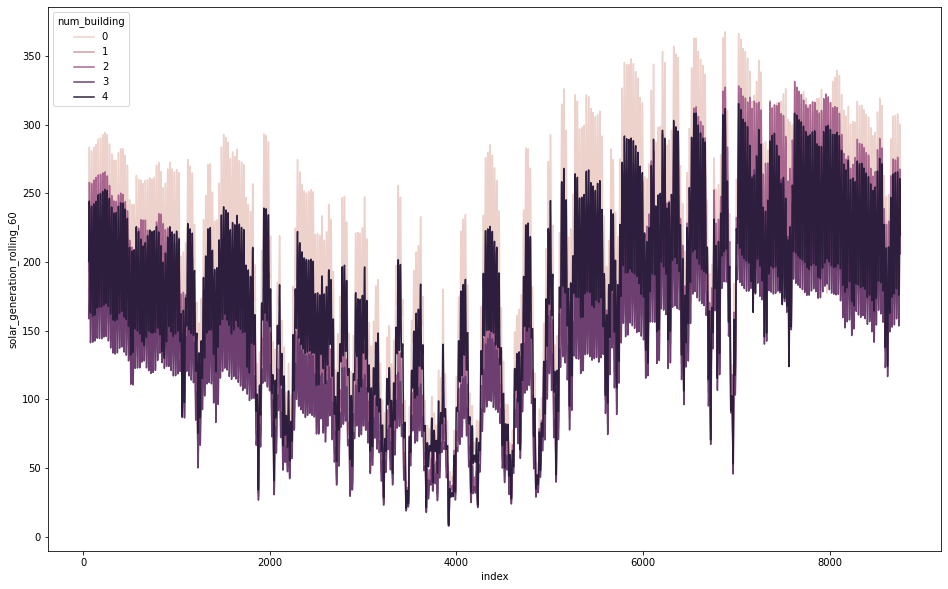

In [107]:
plot_together(df, "index", "solar_generation_rolling_60", "num_building")

# Equipment Electric Power [kWh]

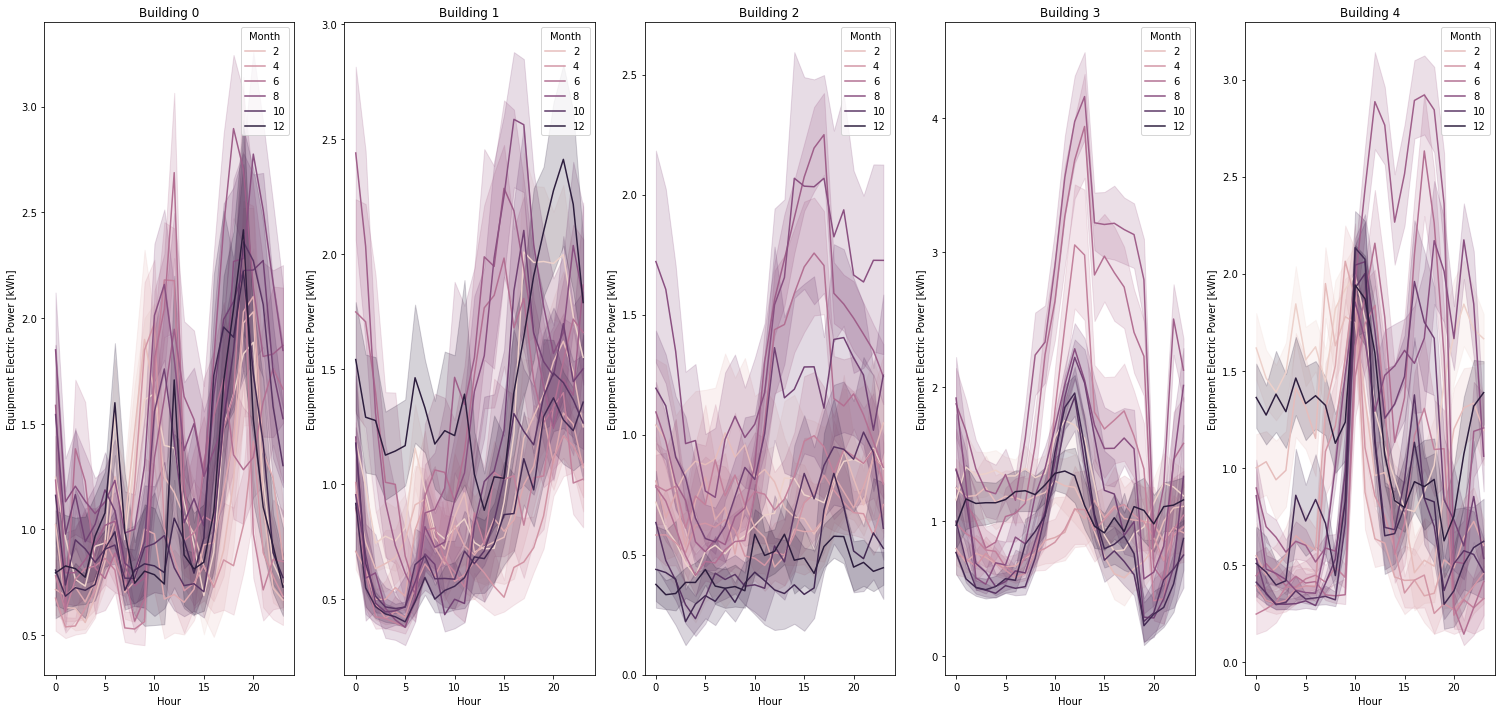

In [72]:
plot_building(df, "Hour", "Equipment Electric Power [kWh]", "Month")

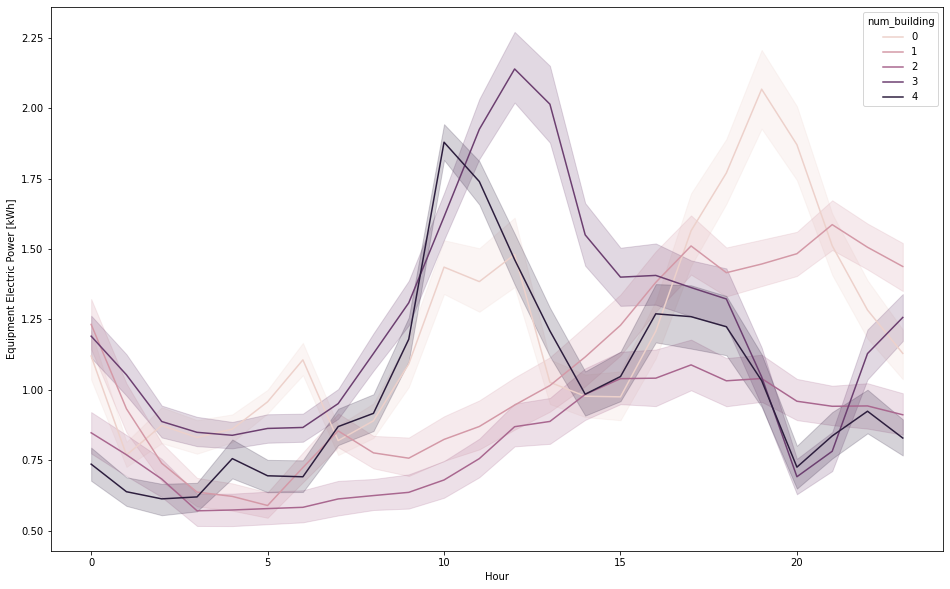

In [73]:
plot_together(df, "Hour", "Equipment Electric Power [kWh]", "num_building")

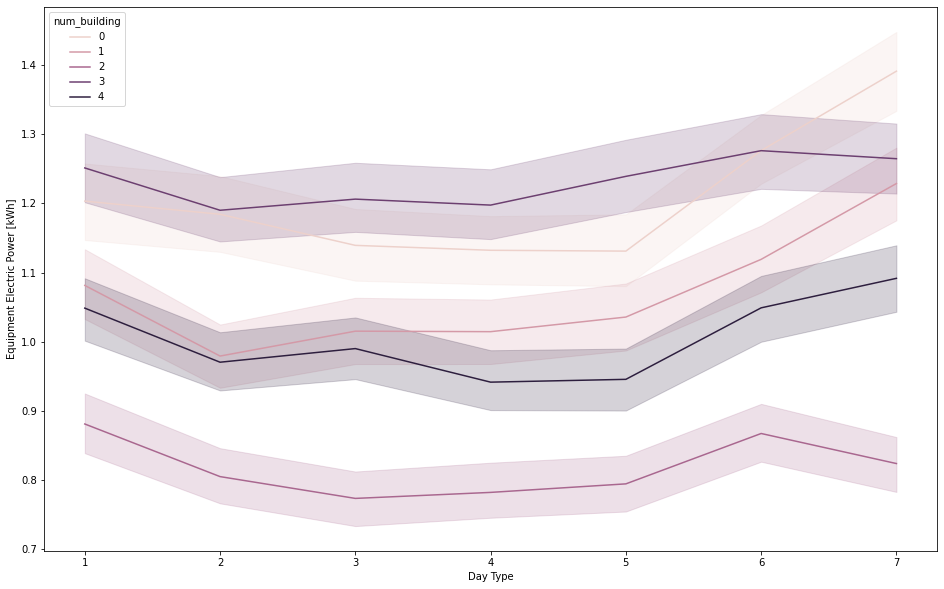

In [74]:
plot_together(df, "Day Type", "Equipment Electric Power [kWh]", "num_building")

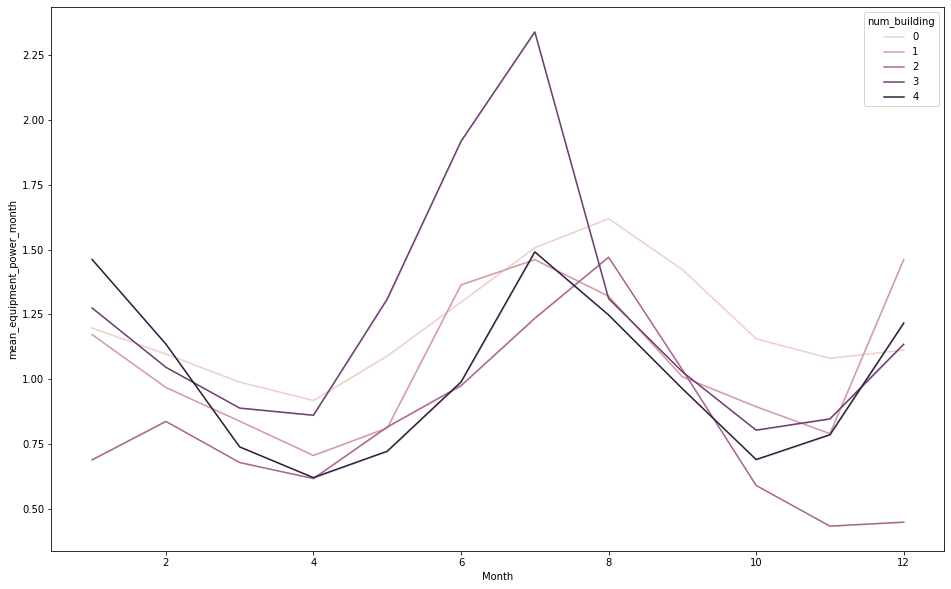

In [87]:
plot_together(df, "Month", "mean_equipment_power_month", "num_building")

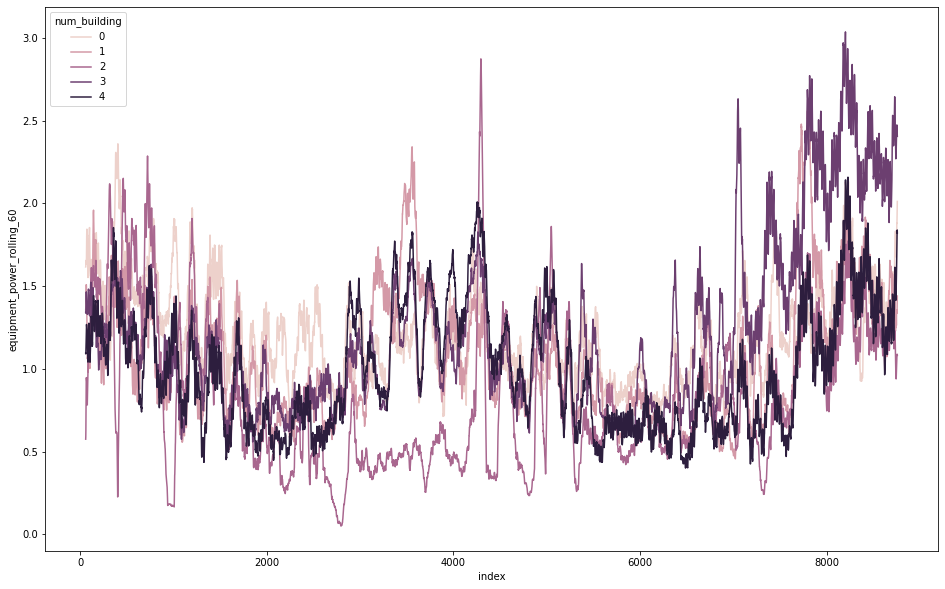

In [108]:
plot_together(df, "index", "equipment_power_rolling_60", "num_building")

In [96]:
len(df[(df["num_building"]==0) & (df["Month"]==6)])

720

In [98]:
720/24

30.0

In [5]:
weather = pd.read_csv('./data/citylearn_challenge_2022_phase_1/weather.csv')

In [6]:
weather

Outdoor Drybulb Temperature [C]  Relative Humidity [%]  \
0                                20.0                   84.0   
1                                20.1                   79.0   
2                                19.7                   78.0   
3                                19.3                   78.0   
4                                18.9                   78.0   
...                               ...                    ...   
8755                             20.6                   84.0   
8756                             21.1                   81.0   
8757                             21.7                   79.0   
8758                             21.3                   76.0   
8759                             20.9                   76.0   

      Diffuse Solar Radiation [W/m2]  Direct Solar Radiation [W/m2]  \
0                                0.0                            0.0   
1                                0.0                            0.0   
2                                0.0                            0.0   
3                                0.0                            0.0   
4                                0.0                            0.0   
...                              ...                            ...   
8755                            26.0                          130.0   
8756                             0.0                            0.0   
8757                             0.0                            0.0   
8758                             0.0                            0.0   
8759                             0.0                            0.0   

      6h Prediction Outdoor Drybulb Temperature [C]  \
0                                              18.3   
1                                              19.4   
2                                              21.1   
3                                              22.2   
4                                              21.7   
...                                             ...   
8755                                           20.1   
8756                                           19.7   
8757                                           19.3   
8758                                           18.9   
8759                                           18.3   

      12h Prediction Outdoor Drybulb Temperature [C]  \
0                                               22.8   
1                                               22.8   
2                                               22.2   
3                                               22.8   
4                                               22.2   
...                                              ...   
8755                                            19.4   
8756                                            21.1   
8757                                            22.2   
8758                                            21.7   
8759                                            22.2   

      24h Prediction Outdoor Drybulb Temperature [C]  \
0                                               20.0   
1                                               19.4   
2                                               19.4   
3                                               19.4   
4                                               18.9   
...                                              ...   
8755                                            20.6   
8756                                            20.0   
8757                                            20.6   
8758                                            20.6   
8759                                            19.4   

      6h Prediction Relative Humidity [%]  \
0                                    81.0   
1                                    79.0   
2                                    73.0   
3                                    71.0   
4                                    73.0   
...                                   ...   
8755                                 79.0   
8756             

In [109]:
df_0 = df[df["num_building"]==0]

In [110]:
df_0

index  Month  Hour  Day Type  Daylight Savings Status  \
0         0    8.0   0.0       1.0                        0   
1         1    8.0   1.0       1.0                        0   
2         2    8.0   2.0       1.0                        0   
3         3    8.0   3.0       1.0                        0   
4         4    8.0   4.0       1.0                        0   
...     ...    ...   ...       ...                      ...   
8755   8755    7.0  19.0       1.0                        0   
8756   8756    7.0  20.0       1.0                        0   
8757   8757    7.0  21.0       1.0                        0   
8758   8758    7.0  22.0       1.0                        0   
8759   8759    7.0  23.0       1.0                        0   

      Equipment Electric Power [kWh]  DHW Heating [kWh]  Cooling Load [kWh]  \
0                           2.275800                  0                   0   
1                           0.851167                  0                   0   
2                           0.834600                  0                   0   
3                           0.838167                  0                   0   
4                           1.478433                  0                   0   
...                              ...                ...                 ...   
8755                        1.346883                  0                   0   
8756                        2.566167                  0                   0   
8757                        3.151700                  0                   0   
8758                        3.021500                  0                   0   
8759                        2.214900                  0                   0   

      Heating Load [kWh]  Solar Generation [W/kW]  ...  \
0                      0                 0.000000  ...   
1                      0                 0.000000  ...   
2                      0                 0.000000  ...   
3                      0                 0.000000  ...   
4                      0                 0.000000  ...   
...                  ...                      ...  ...   
8755                   0                 8.004167  ...   
8756                   0                 0.000000  ...   
8757                   0                 0.000000  ...   
8758                   0                 0.000000  ...   
8759                   0                 0.000000  ...   

      12h Prediction Diffuse Solar Radiation [W/m2]  \
0                                             964.0   
1                                             966.0   
2                                             683.0   
3                                             522.0   
4                                             444.0   
...                                             ...   
8755                                          201.0   
8756                                          420.0   
8757                                          554.0   
8758                                          778.0   
8759                                          903.0   

      24h Prediction Diffuse Solar Radiation [W/m2]  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   
...                                             ...   
8755                                           27.0   
8756                                            0.0   
8757                                            0.0   
8758                                            0.0   
8759                                            0.0   

      6h Prediction Direct Solar Radiation [W/m2]  \
0                                           100.0   
1                                           444.0   
2                                           592.0   
3                                           491.0   
4               

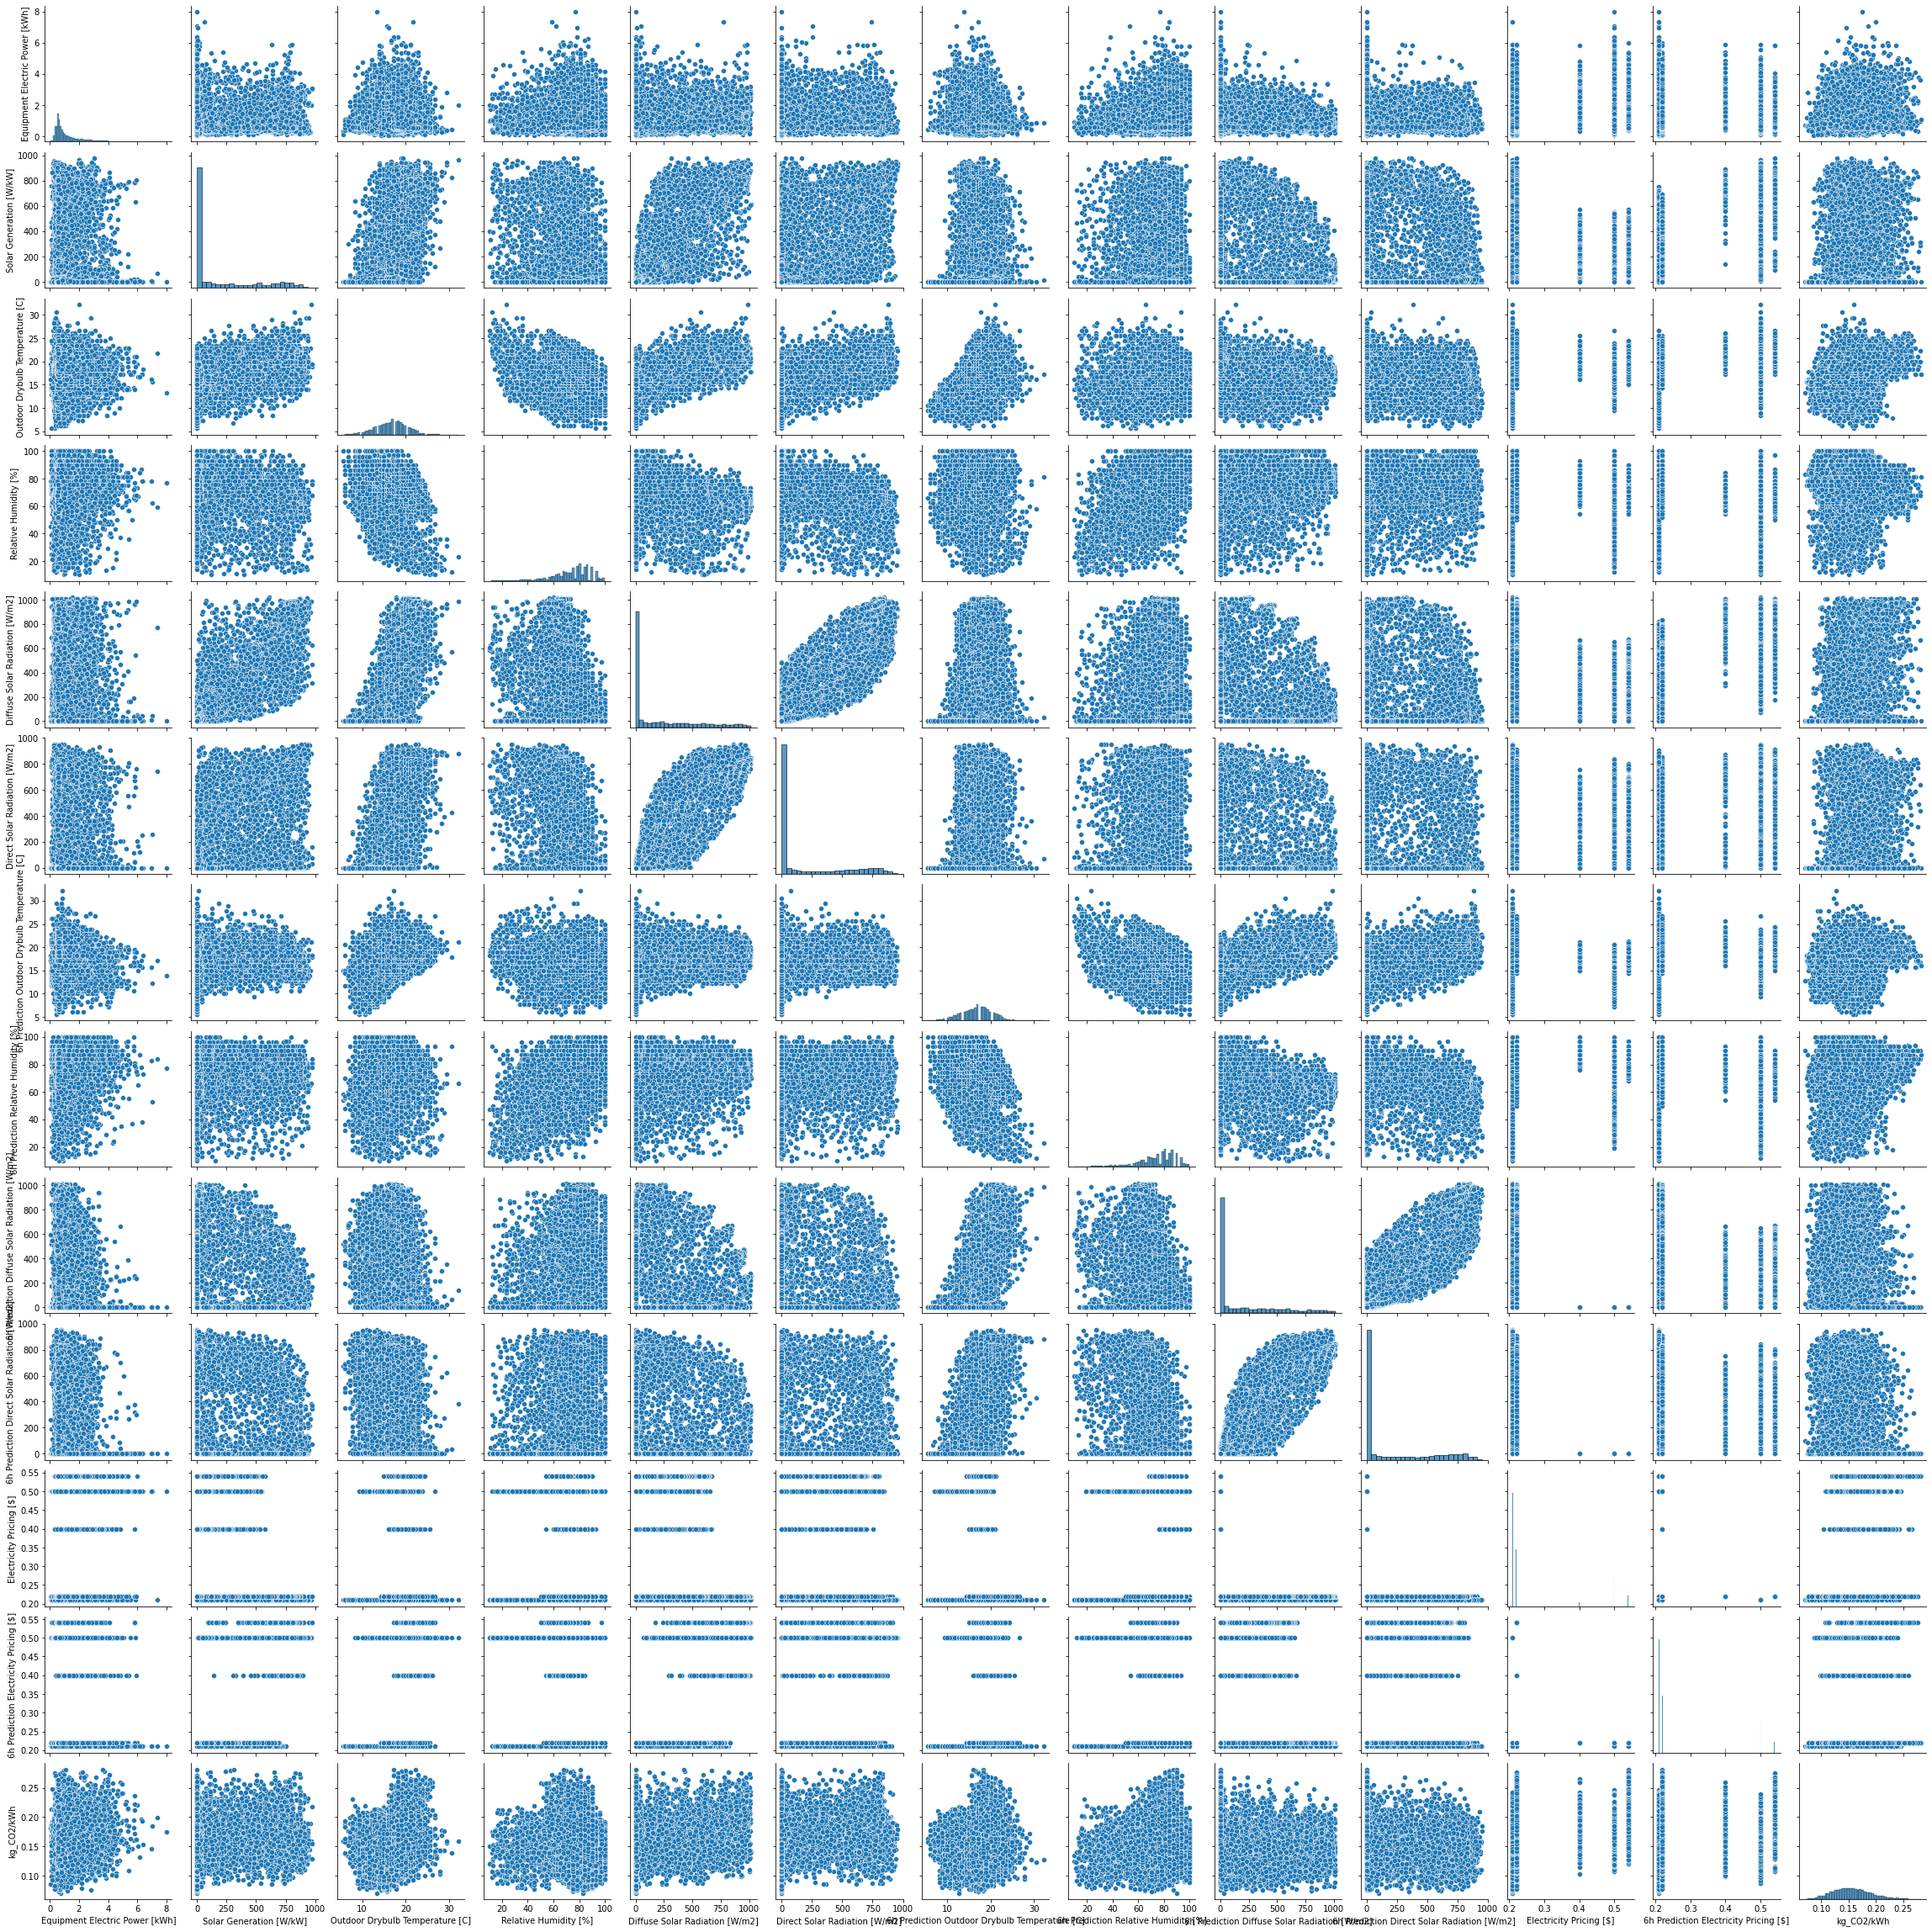

In [42]:
sns.pairplot(df_0[[
       'Equipment Electric Power [kWh]', 'Solar Generation [W/kW]', 'Outdoor Drybulb Temperature [C]',
       'Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       'Electricity Pricing [$]', '6h Prediction Electricity Pricing [$]', 'kg_CO2/kWh']])

<AxesSubplot:ylabel='Relative Humidity [%]'>

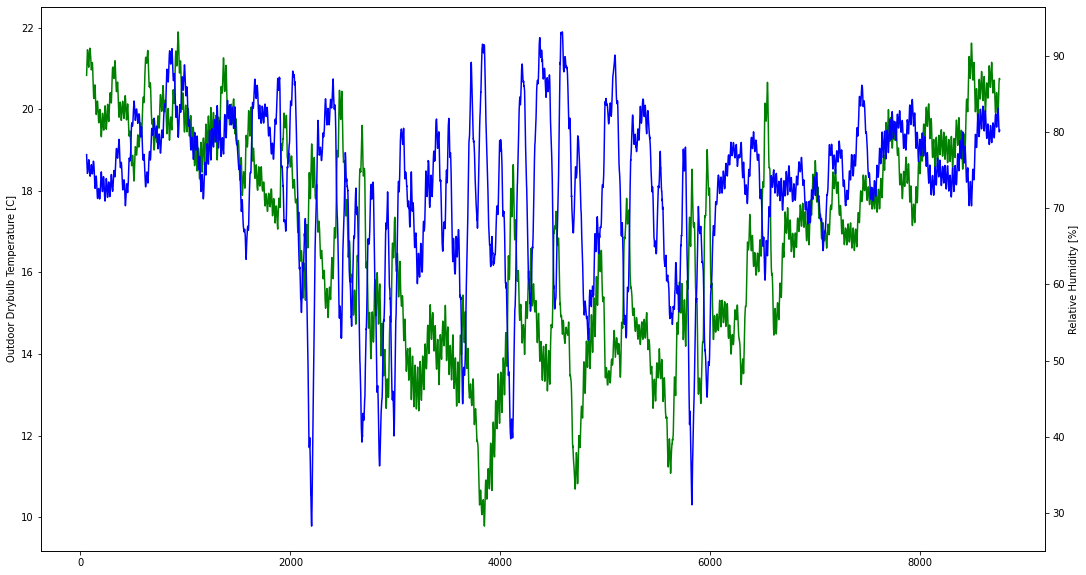

In [61]:
plt.subplots(figsize=(18,10))
sns.lineplot(data=weather.iloc[:, 0].rolling(60).mean(), color='g')
ax2 = plt.twinx()
sns.lineplot(data=weather.iloc[:, 1].rolling(60).mean(), ax=ax2, color='b')

<AxesSubplot:>

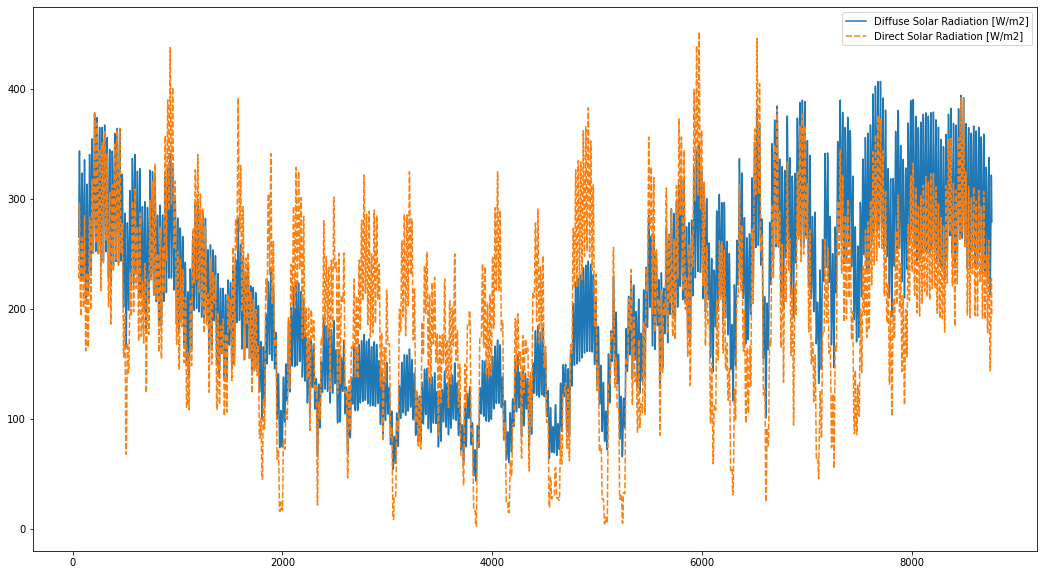

In [62]:
plt.subplots(figsize=(18,10))
sns.lineplot(data=weather.iloc[:, 2:4].rolling(60).mean())

<AxesSubplot:ylabel='Electricity Pricing [$]'>

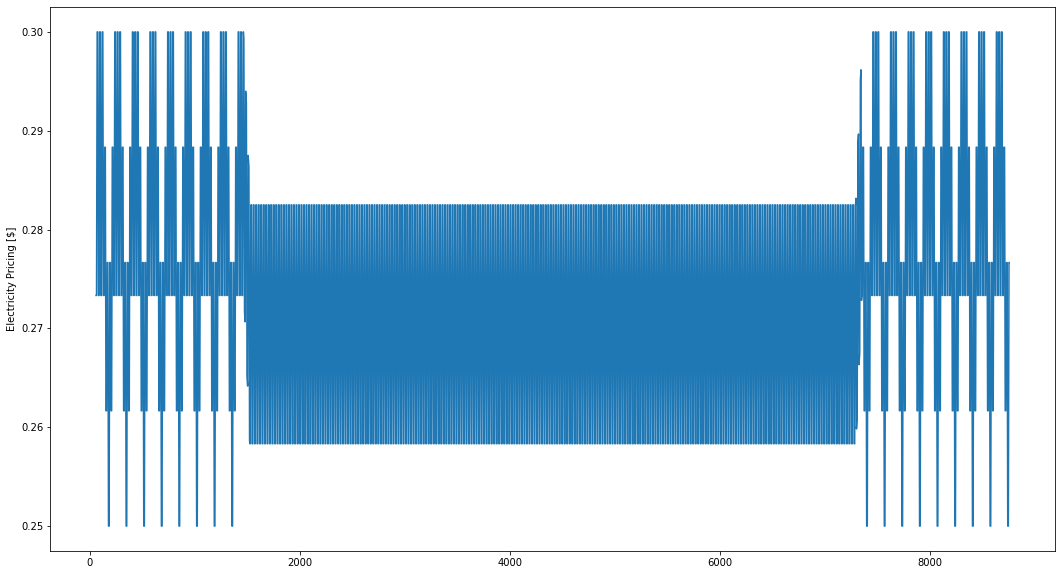

In [67]:
plt.subplots(figsize=(18,10))
sns.lineplot(data=pricing.iloc[:, 0].rolling(60).mean())

<AxesSubplot:>

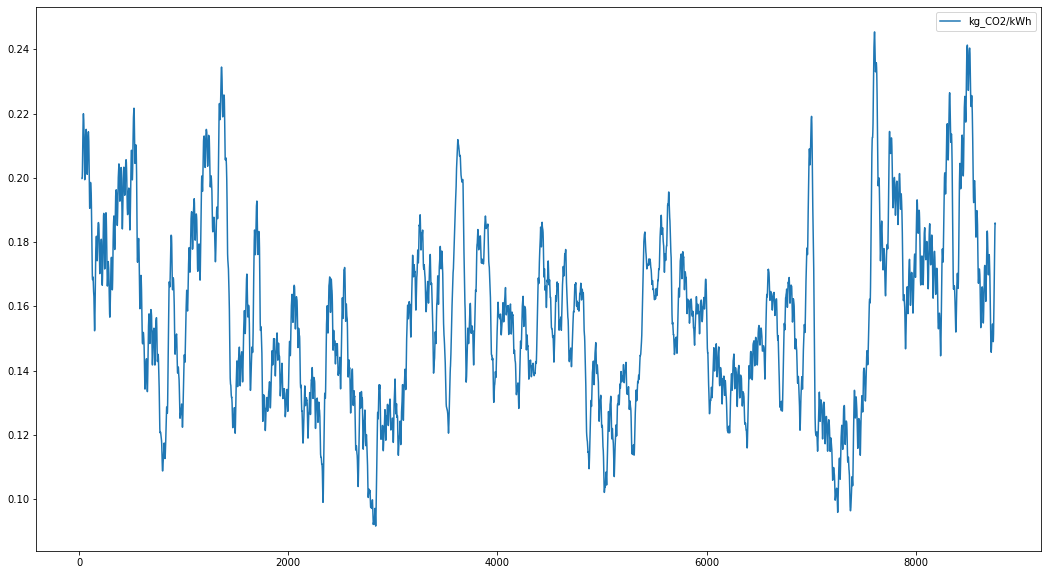

In [70]:
plt.subplots(figsize=(18,10))
sns.lineplot(data=carbon_intensity.rolling(30).mean())

In [113]:
corr = df_0[[
       'Equipment Electric Power [kWh]', 'Solar Generation [W/kW]', 'Outdoor Drybulb Temperature [C]',
       'Relative Humidity [%]', 'Diffuse Solar Radiation [W/m2]',
       'Direct Solar Radiation [W/m2]',
       '6h Prediction Outdoor Drybulb Temperature [C]',
       '6h Prediction Relative Humidity [%]',
       '6h Prediction Diffuse Solar Radiation [W/m2]',
       '6h Prediction Direct Solar Radiation [W/m2]',
       'Electricity Pricing [$]', '6h Prediction Electricity Pricing [$]', 'kg_CO2/kWh']].corr()

<AxesSubplot:>

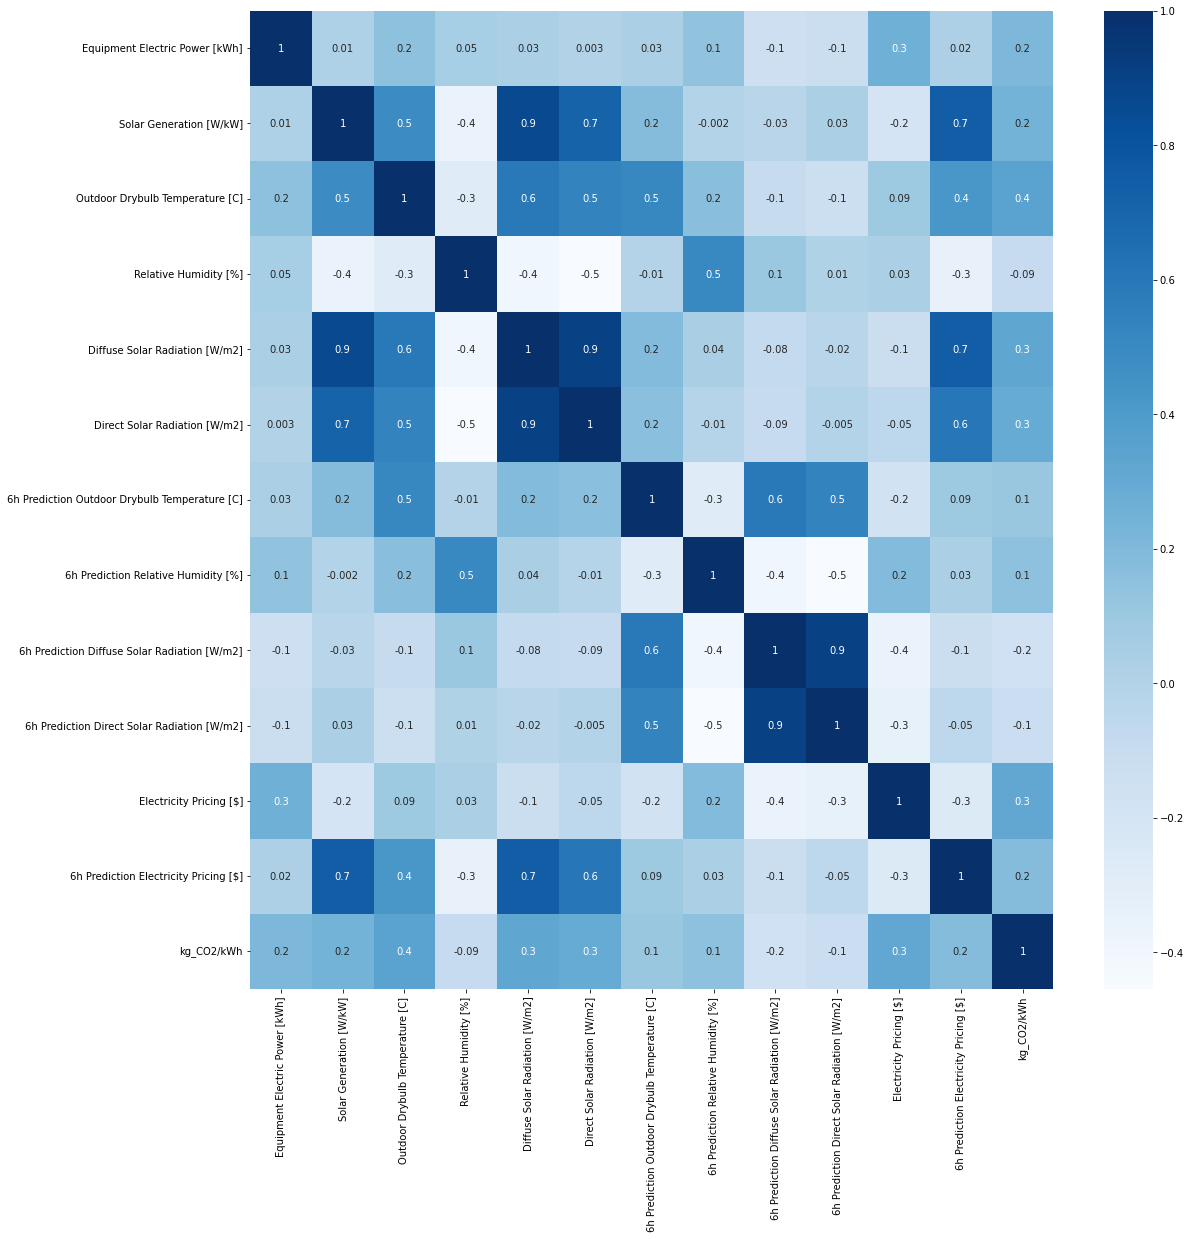

In [115]:
plt.subplots(figsize=(18,18))
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')